# Paquetes

In [52]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import tree
from sklearn import datasets
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

In [53]:
breast_cancer = datasets.load_breast_cancer()
type(breast_cancer)

sklearn.utils.Bunch

# Panda

In [54]:
#Meterlo a un data frame de Panda
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = pd.Series(breast_cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Dividir Datos

In [55]:
X=df[list(df.drop(['target'],inplace=False,axis=1))]
y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=6)

# Entrenar Arbol

In [56]:
#Entrenamos el modelo
tree_class = tree.DecisionTreeClassifier(min_samples_leaf=4)
tree_class = tree_class.fit(X_train, Y_train)

In [57]:
# importancia de cada variable
tree_class.feature_importances_

array([ 0.        ,  0.00640593,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01650271,  0.01498015,
        0.        ,  0.00255221,  0.        ,  0.00201365,  0.        ,
        0.09553357,  0.01787725,  0.04890011,  0.        ,  0.        ,
        0.        ,  0.        ,  0.79523443,  0.        ,  0.        ])

In [58]:
prediction = tree_class.predict(X_test)

Confusion Matrix

In [62]:
confusion = confusion_matrix(Y_test, prediction)
confusion


array([[50,  6],
       [ 5, 53]])

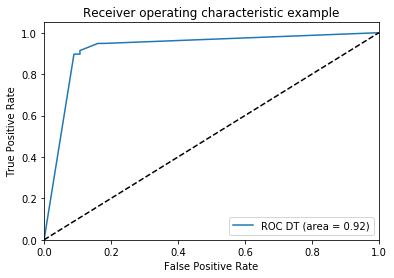

In [63]:
fpr, tpr, thresholds=roc_curve(Y_test,tree_class.predict_proba(X_test)[:,1],pos_label=1)
dt_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC DT (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Accuracy

In [61]:

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90        56
          1       0.90      0.91      0.91        58

avg / total       0.90      0.90      0.90       114

